<a href="https://colab.research.google.com/github/LeMinhTruong16/AI/blob/main/XuLyAnh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#MTCNN
#MULTI TASK CASCADED cnn
from matplotlib.phyplot
from mtcnn import MTCNN

SyntaxError: ignored

In [2]:
!pip3 install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.7 MB/s eta 0:00:00


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3/3 [==============================] - 0s 54ms/step


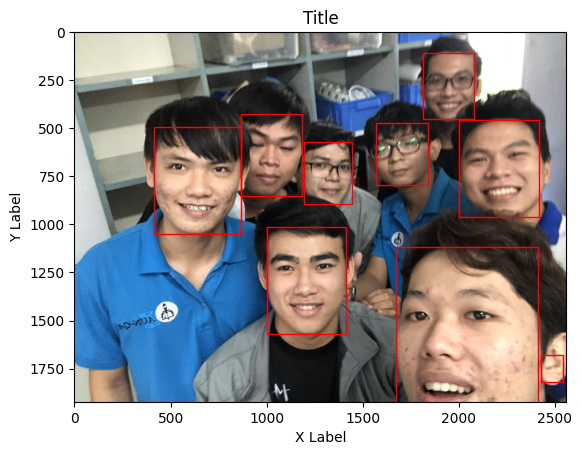

In [40]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN

# Đọc ảnh đầu vào
filename = '/content/drive/MyDrive/AI /AnhTest/anhNhieuNguoi.jpg'
pixels = plt.imread(filename)

# Dùng MTCNN để phát hiện khuôn mặt trong ảnh
detector = MTCNN()
faces = detector.detect_faces(pixels)

# In thông tin về các khuôn mặt được phát hiện
fig, ax = plt.subplots()  # Khởi tạo biến 'ax'
ax.imshow(pixels)
for face in faces:
    x, y, width, height = face['box']
    rect = plt.Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Title')
plt.show()





1/1 [==============================] - 0s 169ms/step


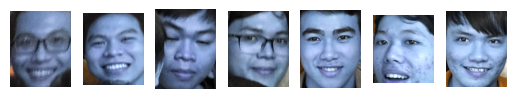

In [49]:
from matplotlib import pyplot as plt
from mtcnn import MTCNN
import cv2

def detect_face(image_path):
    # Đọc ảnh đầu vào
    pixels = cv2.imread(image_path)

    # Dùng MTCNN để phát hiện khuôn mặt trong ảnh
    detector = MTCNN()
    faces = detector.detect_faces(pixels)

    # Lặp qua các khuôn mặt được phát hiện và cắt chúng ra
    for i, face in enumerate(faces):
        x,y,width,height = face['box']
        x1, y1 = abs(x), abs(y)
        x2, y2 = x1 + width, y1 + height
        face_boundary = pixels[y1:y2, x1:x2]
        cv2.imwrite(f"face_{i}.jpg", face_boundary)

        # Hiển thị khuôn mặt đã cắt ra
        plt.subplot(1, len(faces), i+1)
        plt.imshow(face_boundary)
        plt.axis("off")
    plt.show()

# Thử nghiệm chương trình với ảnh đầu vào
image_path = "/content/drive/MyDrive/AI /AnhTest/anhNhieuNguoi.jpg"
detect_face(image_path)


3/3 [==============================] - 0s 39ms/step


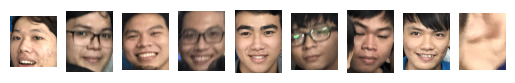

In [53]:
from PIL import Image
def draw_faces(filename, result_list):
  data = plt.imread(filename)
  for i in range (len(result_list)):
    x1, y1, width, height = result_list[i]['box']
    x2, y2 = x1 + width, y1 + height
    face_image = Image.fromarray(data[y1:y2, x1:x2])
    face_image.save(f"/content/drive/MyDrive/AI /AnhTest/face_{i}.jpg")
    plt.subplot(1, len(result_list), i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2, x1:x2])
  plt.show()
filename = '/content/drive/MyDrive/AI /AnhTest/anhNhieuNguoi.jpg'
img = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)
draw_faces(filename, faces)

In [60]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/drive/MyDrive/AI /AnhTest/dogVAng.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

35363/35363 [==============================] - 0s 0us/step
Predicted: [('n02110063', 'malamute', 0.4836483), ('n02109961', 'Eskimo_dog', 0.32745636), ('n02110185', 'Siberian_husky', 0.07276513)]


In [61]:
import torchvision
import torch
import cv2

# Sử dụng mô hình đã được huấn luyện trước đó trên tập dữ liệu COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Chuyển đổi mô hình sang chế độ đánh giá (không phải huấn luyện)
model.eval()

# Các lớp của tập dữ liệu mà mô hình có thể nhận diện (ở đây là COCO)
labels = list(model.backbone.body.layer2[-1].bn3.named_parameters())[1][1].numpy()

# Đường dẫn đến ảnh cần nhận diện
image_path = "/content/drive/MyDrive/AI /AnhTest/dogVAng.jpg"

# Đọc ảnh đầu vào
image = cv2.imread(image_path)

# Chuyển đổi ảnh sang dạng tensor PyTorch
image_tensor = torchvision.transforms.functional.to_tensor(image)

# Thêm một chiều (batch) vào đầu tensor ảnh
image_tensor = image_tensor.unsqueeze(0)

# Nhận diện đối tượng trên ảnh bằng mô hình Faster R-CNN
with torch.no_grad():
    predictions = model(image_tensor)

# Lấy ra các kết quả của mô hình (bounding boxes, class labels, confidence scores)
boxes = predictions[0]['boxes'].numpy()
labels = predictions[0]['labels'].numpy()
scores = predictions[0]['scores'].numpy()

# Vẽ bounding boxes trên ảnh ban đầu
for box, label, score in zip(boxes, labels, scores):
    if score > 0.5:  # Chỉ vẽ bounding box nếu confidence score > 0.5
        x1, y1, x2, y2 = box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), thickness=2)
        cv2.putText(image, labels[label], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), thickness=1)

# Hiển thị ảnh kết quả
cv2.imshow("Result", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 146MB/s]


IndexError: ignored